In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information. { display-mode: "form" }
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FuelConsumptionCo2.csv");

data.head(5)

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

## Learning objectives:

After doing this lab, you'll know how to do the following:

  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

In [ ]:
#epoch: A full training pass over the entire dataset such that each example has been seen once. Thus, an epoch represents N/batch size training iterations, where N is the total number of examples.

## Import relevant modules

The following cell imports the packages that the program requires:

In [ ]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an untrained model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

The details of these functions are very valuable but you can skip them now because they are not relevant to the learning objectives of this lab (they are hidden but you can show them). 
Regardless, you must still run all hidden code cells.


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  history= model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history=model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history .history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

The details of the plotting functions are very valuable but you can skip them now because learning Matplotlib is not relevant to the learning objectives of this lab (they are hidden but you can show them). 
Regardless, you must still run all hidden code cells.

In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.plot(feature, trained_weight*feature + trained_bias, '-r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [ ]:
x = data[["ENGINESIZE"]]
y = data[["CO2EMISSIONS"]]
my_feature = np.asanyarray(x)
my_label = np.asanyarray(y)
#my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
#my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/2000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


9/9 [==============================] - 0s 2ms/step - loss: 69918.5391 - root_mean_squared_error: 264.4211
Epoch 2/2000
9/9 [==============================] - 0s 2ms/step - loss: 69623.2031 - root_mean_squared_error: 263.8621
Epoch 3/2000
9/9 [==============================] - 0s 2ms/step - loss: 69390.0859 - root_mean_squared_error: 263.4200
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 69169.5078 - root_mean_squared_error: 263.0010
Epoch 5/2000
9/9 [==============================] - 0s 3ms/step - loss: 68954.0469 - root_mean_squared_error: 262.5910
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: 68741.0859 - root_mean_squared_error: 262.1852
Epoch 7/2000
9/9 [==============================] - 0s 3ms/step - loss: 68527.5312 - root_mean_squared_error: 261.7776
Epoch 8/2000
9/9 [==============================] - 0s 3ms/step - loss: 68314.8594 - root_mean_squared_error: 261.3711
Epoch 9/2000
9/9 [==============================] - 0s 3ms/st

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


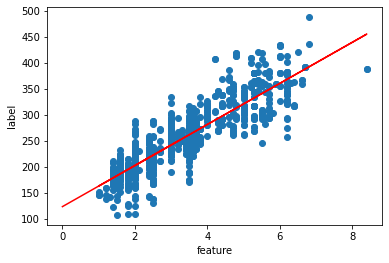

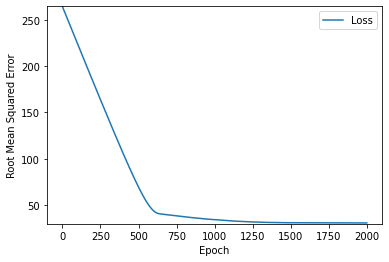

In [ ]:
learning_rate=0.01
epochs=2000
my_batch_size=120

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

In [ ]:
learning_rate=0.01
epochs= 1000   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 330ms/step - loss: 539.2261 - root_mean_squared_error: 23.2212
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 527.1796 - root_mean_squared_error: 22.9604
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 518.5718 - root_mean_squared_error: 22.7722
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 511.4421 - root_mean_squared_error: 22.6151
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 505.1698 - root_mean_squared_error: 22.4760
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 499.4674 - root_mean_squared_error: 22.3488
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 494.1749 - root_mean_squared_error: 22.2300
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 489.1929 - root_mean_squared_error: 22.1177
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 484.45

KeyboardInterrupt: ignored

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

In [ ]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=10
epochs=500 
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/600


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 395ms/step - loss: 445.6107 - root_mean_squared_error: 21.1095
Epoch 2/600
1/1 [==============================] - 0s 10ms/step - loss: 252.6447 - root_mean_squared_error: 15.8948
Epoch 3/600
1/1 [==============================] - 0s 14ms/step - loss: 160.2098 - root_mean_squared_error: 12.6574
Epoch 4/600
1/1 [==============================] - 0s 13ms/step - loss: 105.1230 - root_mean_squared_error: 10.2530
Epoch 5/600
1/1 [==============================] - 0s 11ms/step - loss: 69.7075 - root_mean_squared_error: 8.3491
Epoch 6/600
1/1 [==============================] - 0s 15ms/step - loss: 46.2076 - root_mean_squared_error: 6.7976
Epoch 7/600
1/1 [==============================] - 0s 14ms/step - loss: 30.4422 - root_mean_squared_error: 5.5174
Epoch 8/600
1/1 [==============================] - 0s 14ms/step - loss: 19.8765 - root_mean_squared_error: 4.4583
Epoch 9/600
1/1 [==============================] - 0s 10ms/step - loss: 12.8595 - root_mean

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


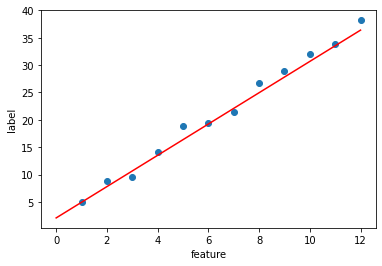

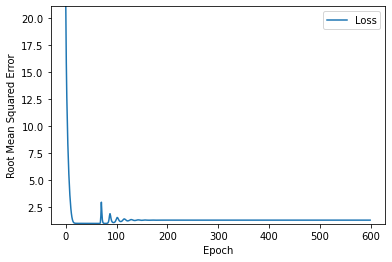

In [ ]:
# Set the learning rate and number of epochs
learning_rate= 0.2  # Replace ? with a floating-point number
epochs= 600   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 3ms/step - loss: 937.3872 - root_mean_squared_error: 30.6168
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 775.3530 - root_mean_squared_error: 27.8452
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 666.2033 - root_mean_squared_error: 25.8109
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 582.6130 - root_mean_squared_error: 24.1374
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 509.2421 - root_mean_squared_error: 22.5664
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 443.9616 - root_mean_squared_error: 21.0704
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 387.0655 - root_mean_squared_error: 19.6740
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 334.7946 - root_mean_squared_error: 18.2974
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 287.0173 - root_mean_

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


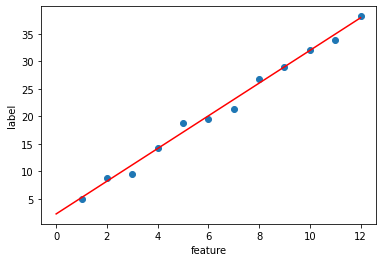

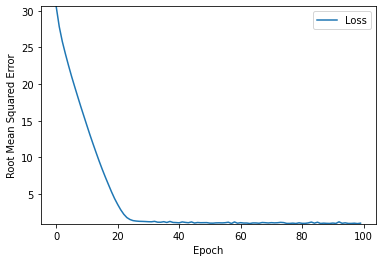

In [ ]:
learning_rate=0.05
epochs=100
my_batch_size= 3  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.